In [65]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',35)

In [3]:
limit=1000
offset=0
params={
    '$limit':limit,
    '$offset':offset
}

In [4]:
url='https://data.buffalony.gov/resource/d6g9-xbgu.json'

In [5]:
df_list=[]
while True:
    params={
        '$limit':limit,
        '$offset':offset
    }
    response=requests.get(url,params=params)
    data=response.json()
    df_page=pd.DataFrame(data)
    if df_page.empty:
        break
    df_list.append(df_page)
    offset+=limit
df=pd.concat(df_list,ignore_index=True)

In [6]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
0,16-1660403,2016-06-14T01:20:00.000,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.889, 42....",42.938,-78.889,14207,Grant-Amherst,NORTH,NORTH,55,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003,18,10,4,2,7,7,NaN
1,16-3480266,2016-12-13T05:00:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.889,-78.809,14206,Lovejoy,LOVEJOY,LOVEJOY,23,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001,8,5,86,1,25,2,2016-12-14T05:07:00.000
2,20-2010167,2020-07-19T03:09:00.000,ASSAULT,Buffalo Police are investigating this report o...,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,NY,NaN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-3210732,2014-11-17T08:08:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,2014-11-18T07:05:00.000
4,15-1100268,2015-04-20T10:22:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314616,24-2181220,2024-08-05T20:23:03.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,20,Monday,600 Block S OGDEN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.802, 42....",42.88,-78.802,14206,Lovejoy,LOVEJOY,LOVEJOY,167,3,3005,167,3,3004,District A,016700,36029016700,360290167003,360290167003005,8,5,39,3,25,2,2024-08-05T20:24:03.000
314617,24-2590734,2024-09-15T17:16:13.000,ASSAULT,Buffalo Police are investigating this report o...,Assault,17,Sunday,0 Block LILAC ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.831, 42....",42.855,-78.831,14220,Hopkins-Tifft,LOVEJOY,LOVEJOY,1.10,3,3033,1.10,3,3030,District A,000110,36029000110,360290001103,360290001103033,1,5,40,3,27,2,2024-09-15T17:16:13.000
314618,24-2161034,2024-08-03T19:25:54.000,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,19,Saturday,2600 Block DELAWARE AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.907, 42....",42.96,-78.907,14207,Riverside,NORTH,NORTH,58.01,3,3000,58.01,3,3000,District D,005801,36029005801,360290058013,360290058013000,18,10,22,2,15,7,2024-08-03T19:26:54.000
314619,24-2640009,2024-09-09T00:00:58.000,BURGLARY,Buffalo Police are investigating this report o...,Breaking & Entering,0,Friday,0 Block CHANDLER ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.891, 42....",42.943,-78.891,14207,Grant-Amherst,NORTH,NORTH,55,1,1003,55,1,1006,District D,005500,36029005500,360290055001,360290055001003,18,10,4,2,7,7,2024-09-20T00:08:58.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314621 entries, 0 to 314620
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  314621 non-null  object
 1   incident_datetime            314621 non-null  object
 2   incident_type_primary        314621 non-null  object
 3   incident_description         314621 non-null  object
 4   parent_incident_type         314621 non-null  object
 5   hour_of_day                  314621 non-null  object
 6   day_of_week                  314621 non-null  object
 7   address_1                    314583 non-null  object
 8   city                         314621 non-null  object
 9   state                        314621 non-null  object
 10  location                     308389 non-null  object
 11  latitude                     313639 non-null  object
 12  longitude                    313639 non-null  object
 13  zip_code      

In [8]:
df['incident_datetime']=pd.to_datetime(df['incident_datetime'],format='%Y-%m-%dT%H:%M:%S.%f')

In [9]:
df['incident_description'].value_counts()

incident_description
Buffalo Police are investigating this report of a crime.  It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.    305123
Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.       5228
LARCENY/THEFT                                                                                                                                                                                                                 2049
BURGLARY                                                                                                                                                                                                                      1090
ASSAULT                                                                

In [10]:
df['incident_description'] = df['incident_description'].str.replace(r'\s+', ' ', regex=True)

In [11]:
df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [12]:
df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [13]:
df['incident_description'].value_counts()

incident_description
under investigation         310351
LARCENY/THEFT                 2049
BURGLARY                      1090
ASSAULT                        715
SEXUAL ABUSE                   148
UUV                            108
RAPE                            75
ROBBERY                         40
CRIM NEGLIGENT HOMICIDE         25
THEFT OF SERVICES               11
AGG ASSAULT ON P/OFFICER         4
AGGR ASSAULT                     3
MURDER                           2
Name: count, dtype: int64

In [14]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
0,16-1660403,2016-06-14 01:20:00,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.889, 42....",42.938,-78.889,14207,Grant-Amherst,NORTH,NORTH,55,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003,18,10,4,2,7,7,NaN
1,16-3480266,2016-12-13 05:00:00,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.889,-78.809,14206,Lovejoy,LOVEJOY,LOVEJOY,23,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001,8,5,86,1,25,2,2016-12-14T05:07:00.000
2,20-2010167,2020-07-19 03:09:00,ASSAULT,under investigation,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,NY,NaN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-3210732,2014-11-17 08:08:00,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,2014-11-18T07:05:00.000
4,15-1100268,2015-04-20 10:22:00,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314616,24-2181220,2024-08-05 20:23:03,LARCENY/THEFT,under investigation,Theft,20,Monday,600 Block S OGDEN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.802, 42....",42.88,-78.802,14206,Lovejoy,LOVEJOY,LOVEJOY,167,3,3005,167,3,3004,District A,016700,36029016700,360290167003,360290167003005,8,5,39,3,25,2,2024-08-05T20:24:03.000
314617,24-2590734,2024-09-15 17:16:13,ASSAULT,under investigation,Assault,17,Sunday,0 Block LILAC ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.831, 42....",42.855,-78.831,14220,Hopkins-Tifft,LOVEJOY,LOVEJOY,1.10,3,3033,1.10,3,3030,District A,000110,36029000110,360290001103,360290001103033,1,5,40,3,27,2,2024-09-15T17:16:13.000
314618,24-2161034,2024-08-03 19:25:54,UUV,under investigation,Theft of Vehicle,19,Saturday,2600 Block DELAWARE AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.907, 42....",42.96,-78.907,14207,Riverside,NORTH,NORTH,58.01,3,3000,58.01,3,3000,District D,005801,36029005801,360290058013,360290058013000,18,10,22,2,15,7,2024-08-03T19:26:54.000
314619,24-2640009,2024-09-09 00:00:58,BURGLARY,under investigation,Breaking & Entering,0,Friday,0 Block CHANDLER ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.891, 42....",42.943,-78.891,14207,Grant-Amherst,NORTH,NORTH,55,1,1003,55,1,1006,District D,005500,36029005500,360290055001,360290055001003,18,10,4,2,7,7,2024-09-20T00:08:58.000


In [15]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          38
city                                0
state                               0
location                         6232
latitude                          982
longitude                         982
zip_code                         2393
neighborhood                     3305
council_district                 2450
council_district_2011            2393
census_tract                     3305
census_block_group               3305
census_block                     3305
census_tract_2010                3305
census_block_group_2010          3305
census_block_2010                3305
police_district                  3305
tractce20                        3165
geoid20_tract                    3165
geoid20_bloc

In [16]:
df=df.replace('UNKNOWN',np.nan)

In [17]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          60
city                                0
state                               0
location                         6232
latitude                         6232
longitude                        6232
zip_code                         3633
neighborhood                     6356
council_district                 2450
council_district_2011            3708
census_tract                     6214
census_block_group               6214
census_block                     6214
census_tract_2010               19351
census_block_group_2010         19391
census_block_2010               19353
police_district                  6234
tractce20                        6214
geoid20_tract                    6214
geoid20_bloc

In [18]:
df=df.sort_values(by='incident_datetime')

In [19]:
# df.to_csv('crime_dataset_buffalo.csv')

In [20]:
df['hour_of_day']=pd.to_datetime(df['hour_of_day'],format='%H')
df['hour_of_day']=df['hour_of_day'].dt.hour

In [21]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          60
city                                0
state                               0
location                         6232
latitude                         6232
longitude                        6232
zip_code                         3633
neighborhood                     6356
council_district                 2450
council_district_2011            3708
census_tract                     6214
census_block_group               6214
census_block                     6214
census_tract_2010               19351
census_block_group_2010         19391
census_block_2010               19353
police_district                  6234
tractce20                        6214
geoid20_tract                    6214
geoid20_bloc

In [22]:
df=df[df['incident_datetime']>='2009']


In [23]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
57748,09-0810383,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,1 Block 15TH ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.885, 42....",42.906,-78.885,14213,West Side,NIAGARA,NIAGARA,69.03,1,1004,69.02,1,1004,District B,006903,36029006903,360290001101,360290055001004,10,6,77,5,3,5,NaN
26437,09-3010604,2009-01-01 00:00:00,RAPE,under investigation,Sexual Assault,0,Thursday,500 Block W UTICA ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.888, 42....",42.911,-78.888,14213,West Side,NIAGARA,NIAGARA,69.01,1,1004,69.01,1,1004,District B,006901,36029006901,360290001101,360290055001004,10,6,67,5,3,5,NaN
52369,09-0010819,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,1 Block HEWARD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.905, 42....",42.949,-78.905,14207,Riverside,NORTH,NORTH,58.02,2,2011,58.02,2,2010,District D,005802,36029005802,360290001102,360290170002011,18,10,64,2,15,7,NaN
11906,11-2100623,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,2300 Block SENECA ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.804, 42....",42.851,-78.804,14210,Seneca-Cazenovia,SOUTH,SOUTH,10,1,1006,10,1,1005,District A,001000,36029001000,360290001101,360290035021006,3,9,83,3,18,4,NaN
127609,19-0740519,2009-01-01 00:00:00,SEXUAL ABUSE,under investigation,Other Sexual Offense,0,Thursday,200 Block BEARD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.837, 42....",42.943,-78.837,14214,Central Park,DELAWARE,DELAWARE,45,4,4008,45,4,4008,District D,004500,36029004500,360290002004,360290031004008,20,1,85,2,11,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314591,24-2771209,2024-10-03 22:47:14,LARCENY/THEFT,under investigation,Theft,22,Thursday,0 Block E HURON ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.871, 42....",42.888,-78.871,14203,Central,ELLICOTT,ELLICOTT,165,1,1003,165,1,1041,District B,016500,36029016500,360290165001,360290165001003,16,4,80,5,16,3,2024-10-03T22:47:14.000
314229,24-2780132,2024-10-04 03:57:00,ASSAULT,under investigation,Assault,3,Friday,1000 Block E LOVEJOY ST,Buffalo,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-04T03:58:56.000
314474,24-2780209,2024-10-04 07:32:02,LARCENY/THEFT,under investigation,Theft,7,Friday,200 Block RODNEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.834, 42....",42.936,-78.834,14214,Fillmore-Leroy,MASTEN,MASTEN,40.03,3,3004,40.01,3,3004,District E,004003,36029004003,360290040033,360290040033004,20,8,1,4,10,1,2024-10-04T07:33:02.000
314353,24-2780289,2024-10-04 07:54:00,LARCENY/THEFT,under investigation,Theft,8,Friday,500 Block WALDEN AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.814, 42....",42.905,-78.814,14211,Genesee-Moselle,LOVEJOY,LOVEJOY,28.02,1,1002,28,4,4002,District C,002802,36029002802,360290028021,360290028021002,17,5,90,1,24,2,2024-10-04T08:49:55.000


In [24]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          35
city                                0
state                               0
location                         5962
latitude                         5962
longitude                        5962
zip_code                         3272
neighborhood                     5955
council_district                 2321
council_district_2011            3329
census_tract                     5855
census_block_group               5855
census_block                     5855
census_tract_2010               18969
census_block_group_2010         18997
census_block_2010               18971
police_district                  5867
tractce20                        5855
geoid20_tract                    5855
geoid20_bloc

In [25]:
df=df.reset_index(drop=True)

In [43]:
df['incident_type_primary']=df['incident_type_primary'].str.lower()

In [44]:
df['incident_type_primary'].value_counts()

incident_type_primary
larceny/theft               113129
assault                      52457
burglary                     45280
uuv                          24658
robbery                      15666
rape                          2383
sexual abuse                  2332
theft of services             1801
murder                         846
aggr assault                    83
breaking & entering             83
crim negligent homicide         74
theft                           33
manslaughter                    14
agg assault on p/officer        12
sexual assault                   5
theft of vehicle                 3
sodomy                           3
other sexual offense             2
homicide                         1
Name: count, dtype: int64

In [45]:
df.columns

Index(['case_number', 'incident_datetime', 'incident_type_primary',
       'incident_description', 'parent_incident_type', 'hour_of_day',
       'day_of_week', 'address_1', 'city', 'state', 'location', 'latitude',
       'longitude', 'zip_code', 'neighborhood', 'council_district',
       'council_district_2011', 'census_tract', 'census_block_group',
       'census_block', 'census_tract_2010', 'census_block_group_2010',
       'census_block_2010', 'police_district', 'tractce20', 'geoid20_tract',
       'geoid20_blockgroup', 'geoid20_block', ':@computed_region_jdfw_hhbp',
       ':@computed_region_h7a8_iwt4', ':@computed_region_ff6v_jbaa',
       ':@computed_region_vsen_jbmg', ':@computed_region_nmyf_6jtp',
       ':@computed_region_yg52_574g', 'created_at'],
      dtype='object')

In [46]:
df['latitude']=df['latitude'].astype('float64')
df['longitude']=df['longitude'].astype('float64')

In [47]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          35
city                                0
state                               0
location                         5962
latitude                         5962
longitude                        5962
zip_code                         3272
neighborhood                     5955
council_district                 2321
council_district_2011            3329
census_tract                     5855
census_block_group               5855
census_block                     5855
census_tract_2010               18969
census_block_group_2010         18997
census_block_2010               18971
police_district                  5867
tractce20                        5855
geoid20_tract                    5855
geoid20_bloc

In [48]:
df_filtered=df.drop(columns=['created_at'])

In [49]:
df_filtered

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g
0,09-0810383,2009-01-01 00:00:00,larceny/theft,under investigation,Theft,0,Thursday,1 Block 15TH ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.885, 42....",42.906,-78.885,14213,West Side,NIAGARA,NIAGARA,69.03,1,1004,69.02,1,1004,District B,006903,36029006903,360290001101,360290055001004,10,6,77,5,3,5
1,09-3010604,2009-01-01 00:00:00,rape,under investigation,Sexual Assault,0,Thursday,500 Block W UTICA ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.888, 42....",42.911,-78.888,14213,West Side,NIAGARA,NIAGARA,69.01,1,1004,69.01,1,1004,District B,006901,36029006901,360290001101,360290055001004,10,6,67,5,3,5
2,09-0010819,2009-01-01 00:00:00,larceny/theft,under investigation,Theft,0,Thursday,1 Block HEWARD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.905, 42....",42.949,-78.905,14207,Riverside,NORTH,NORTH,58.02,2,2011,58.02,2,2010,District D,005802,36029005802,360290001102,360290170002011,18,10,64,2,15,7
3,11-2100623,2009-01-01 00:00:00,larceny/theft,under investigation,Theft,0,Thursday,2300 Block SENECA ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.804, 42....",42.851,-78.804,14210,Seneca-Cazenovia,SOUTH,SOUTH,10,1,1006,10,1,1005,District A,001000,36029001000,360290001101,360290035021006,3,9,83,3,18,4
4,19-0740519,2009-01-01 00:00:00,sexual abuse,under investigation,Other Sexual Offense,0,Thursday,200 Block BEARD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.837, 42....",42.943,-78.837,14214,Central Park,DELAWARE,DELAWARE,45,4,4008,45,4,4008,District D,004500,36029004500,360290002004,360290031004008,20,1,85,2,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258860,24-2771209,2024-10-03 22:47:14,larceny/theft,under investigation,Theft,22,Thursday,0 Block E HURON ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.871, 42....",42.888,-78.871,14203,Central,ELLICOTT,ELLICOTT,165,1,1003,165,1,1041,District B,016500,36029016500,360290165001,360290165001003,16,4,80,5,16,3
258861,24-2780132,2024-10-04 03:57:00,assault,under investigation,Assault,3,Friday,1000 Block E LOVEJOY ST,Buffalo,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258862,24-2780209,2024-10-04 07:32:02,larceny/theft,under investigation,Theft,7,Friday,200 Block RODNEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.834, 42....",42.936,-78.834,14214,Fillmore-Leroy,MASTEN,MASTEN,40.03,3,3004,40.01,3,3004,District E,004003,36029004003,360290040033,360290040033004,20,8,1,4,10,1
258863,24-2780289,2024-10-04 07:54:00,larceny/theft,under investigation,Theft,8,Friday,500 Block WALDEN AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.814, 42....",42.905,-78.814,14211,Genesee-Moselle,LOVEJOY,LOVEJOY,28.02,1,1002,28,4,4002,District C,002802,36029002802,360290028021,360290028021002,17,5,90,1,24,2


In [50]:
df_filtered.dropna(axis='index',inplace=True)

In [52]:
# df_filtered.to_csv('filtered_data.csv')

In [41]:
df_filtered['address_1']=df_filtered['address_1'].str.lower()

In [54]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'
df_filtered['time_of_day'] = df_filtered['hour_of_day'].apply(categorize_time_of_day)
df_filtered[['incident_datetime', 'hour_of_day', 'time_of_day']].head()

,incident_datetime,hour_of_day,time_of_day
0,2009-01-01,0,Late Night
1,2009-01-01,0,Late Night
2,2009-01-01,0,Late Night
3,2009-01-01,0,Late Night
4,2009-01-01,0,Late Night


In [56]:
time_of_day_grp=df_filtered.groupby('time_of_day')

In [68]:
df_time_crime_day=time_of_day_grp[['parent_incident_type']].count()
df_time_crime_day

,parent_incident_type
time_of_day,
Afternoon,58209
Evening,44344
Late Night,50838
Morning,52751
Night,32237


In [72]:
df_time_crime_day=df_time_crime_day.sort_values(by='parent_incident_type',ascending=False)

<BarContainer object of 5 artists>

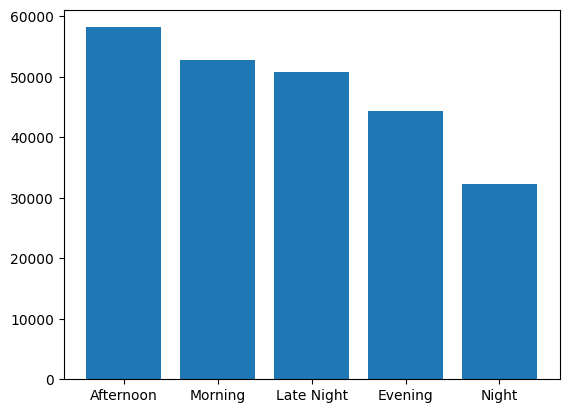

In [73]:
plt.bar(df_time_crime_day.index,df_time_crime_day['parent_incident_type'],color=)